In [5]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style, colors
import matplotlib.patches as patches
from matplotlib import gridspec

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8, 6)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# instructions to run this script

1. make input file
file format:the input file is a csv file. rows are genes and columns are patient ids. rows and columns must be sorted to the order you want them to appear in the oncoprint.
values: the mutation type for each gene and patient combination. the mutation types have to be one of the following. If this script is to be repurposed for other type of data, the constant "mutations" has to be changed to accommodate other categorical values.
mutation categories: 'NON_SYNONYMOUS_CODING', 'CODON_INSERTION_DELETION', 'FRAME_SHIFT', 'SPLICE_ACCEPTOR_DONOR',  'STOP_GAINED', 'Multiple'. 

2. mutation type and color map:
currently, a specific list of colors are used to represent each mutation type.

3. parameters potentially need to be adjusted
some effort has been made to keep this script flexible. However, depending on the data size, for example number of genes and number of patients, certain parameters need to manually adjusted in order to output a neat and informative plot. these parameters include but not limited to figure size, mutation types, distinctive colors, the legend size and arrangement, label and font size, etc.

4. run this script
just go to cell 6, replace the example input file with your file and then run the whole script by clicking "Run All" under "Cell" in the drop down menu. the oncoprint is saved in the same directory as your input file with an file extension ".png".

In [6]:
# constants
all_colors = [ "purple", "#E69F00","#009E73","#56B4E9",
              "#377EB8","#E41A1C","#F0E442",'black',"#D55E00","#CC79A7", 'pink', 'gray']
mutations = ['NON_SYNONYMOUS_CODING', 
             'CODON_INSERTION_DELETION', 
             'FRAME_SHIFT',              
             'SPLICE_ACCEPTOR_DONOR', 
             'STOP_GAINED',
             'Multiple']

# make map dictionary
map_dict = {k:v for v, k in  enumerate(mutations)} 
clrs = all_colors[:len(map_dict)]    
clrmap_dict = {k:v for k, v in zip(map_dict.keys(), clrs)}
cmap = colors.ListedColormap(clrs)
mut_colors = [clrmap_dict[m] for m in mutations]

In [7]:
def add_patches(ax, features, column, clrmap_dict):
    k = 0
    for feature in features:
        types = len(features)
        clr = clrmap_dict[feature]
        rect = patches.Rectangle((0+column*.2, .9-k*0.1), .1, .05, 
                             linewidth=0.001,
                             edgecolor=clr,
                             facecolor=clr)

        _ = ax.text(0.15+column*.2, .9-k*0.1+.02, 
                     feature, 
                     ha='left', 
                     va='center', 
                     fontsize=9)
        _ = ax.add_patch(rect)
        k+=.6
    _ = ax.get_xaxis().set_ticks([])
    _ = ax.get_yaxis().set_ticks([])
    _ = ax.set_title('')


In [10]:
def plot_oncoprint(df):
    nrows = df.shape[0]    
    fig = plt.figure(figsize=(12,.55*nrows), facecolor='white')
    gs = gridspec.GridSpec(1, 2,                            
                           width_ratios=[6,1], 

                           wspace=0.0, # horizontal space
                          )

    # plot heatmap for gene mutations
    dfm = df.apply(lambda x: x.map(map_dict)).astype(float)
    print('plotting mutations! color_mutation mapping relationship:', clrmap_dict)
    gs0 = gs[0]
    ax0 = plt.subplot(gs0, facecolor='beige')
    sns.heatmap(dfm, 
                ax=ax0, 
                cmap=cmap,
                linewidths=.05,                    
                xticklabels=True,
                yticklabels=True,
                cbar=False) 
    _ = ax0.tick_params(axis='x', which='major', labelsize=9)
    _ = ax0.set_xticklabels(ax0.xaxis.get_majorticklabels(), rotation=90)
    _ = ax0.set_xlabel('')
    _ = ax0.set_ylabel('')
    _ = plt.setp(ax0.get_yticklines(),visible=False)
    _ = plt.setp(ax0.get_xticklines(),visible=False)

    # plot legend
    gs1 = gs[1]
    ax1 =  plt.subplot(gs1, frameon=False)
    _ = add_patches(ax1, mutations, 1, clrmap_dict)

    pf = '{}.oncoprint.png'.format(of)
    %time plt.savefig(pf, bbox_inches='tight',dpi=200)
    plt.show()

plotting mutations! color_mutation mapping relationship: {'NON_SYNONYMOUS_CODING': 'purple', 'CODON_INSERTION_DELETION': '#E69F00', 'FRAME_SHIFT': '#009E73', 'SPLICE_ACCEPTOR_DONOR': '#56B4E9', 'STOP_GAINED': '#377EB8', 'Multiple': '#E41A1C'}
CPU times: user 1.1 s, sys: 136 ms, total: 1.24 s
Wall time: 1.25 s


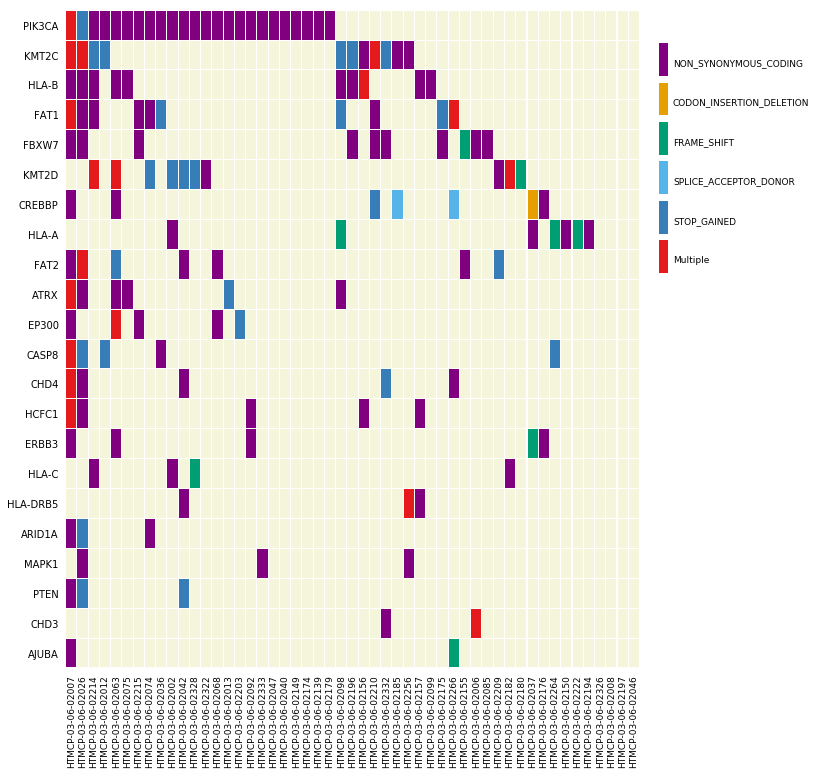

In [11]:
# example input file
of =  '/home/szong/projects/development/oncoprint/example_oncoprint_input_file.txt'
df = pd.read_csv(of, index_col='gene')
_ = plot_oncoprint(df)